In [39]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

figuredir = '../latex/figure/plot'

Laser power was measured at $\lambda=700\ \text{nm}$ to be $P\approx1\ \text{mW}$.

The oscilloscope is configured to 5 s per division and 50 mV per division for all three channels.

In [7]:
def read_agilent(filename):
  """
  Reads the CSV export from the Agilent oscilloscope
  """
  return pd.read_csv(filename, skiprows=2, names=['time', 'DIFFX', 'DIFFY', 'SUM'])


data = {file.split('.csv')[0]: read_agilent(file) for file in os.listdir() if file.endswith('.csv')}

The datasheet of the S5990 position-sensitive photodiode gives the following conversion formula

$$
\begin{align}
\frac{(I_2+I_3)-(I_1+I_4)}{I_1+I_2+I_3+I_4}=\frac{2x}{L},
&&
\frac{(I_2+I_4)-(I_1+I_3)}{I_1+I_2+I_3+I_4}=\frac{2y}{L},
\end{align}
\tag{1}
$$

wherein $L=4.5\ \text{mm}$ for the smaller S5990-01 variant and $L=10.0\ \text{mm}$ for the larger S5991-01 variant. In our case, we use the smaller S5990-01 variant.

The numerator of the equations given in (1) corresponds to the DIFFX respective DIFFY signal while the denominator corresponds to the SUM signal.

Hence, our conversion formula is

$$
\begin{align}
x=2.25\frac{\text{DIFFX}}{\text{SUM}}\ \text{mm}, &&
y=2.25\frac{\text{DIFFY}}{\text{SUM}}\ \text{mm}.
\tag{2}
\end{align}
$$

In [8]:
def convert(df):
  """
  Outputs the spatial coordinaes in units of mm from a dataframe.
  """
  x = 2.25 * df['DIFFX'] / df['SUM']
  y = 2.25 * df['DIFFY'] / df['SUM']
  
  return (x, y)

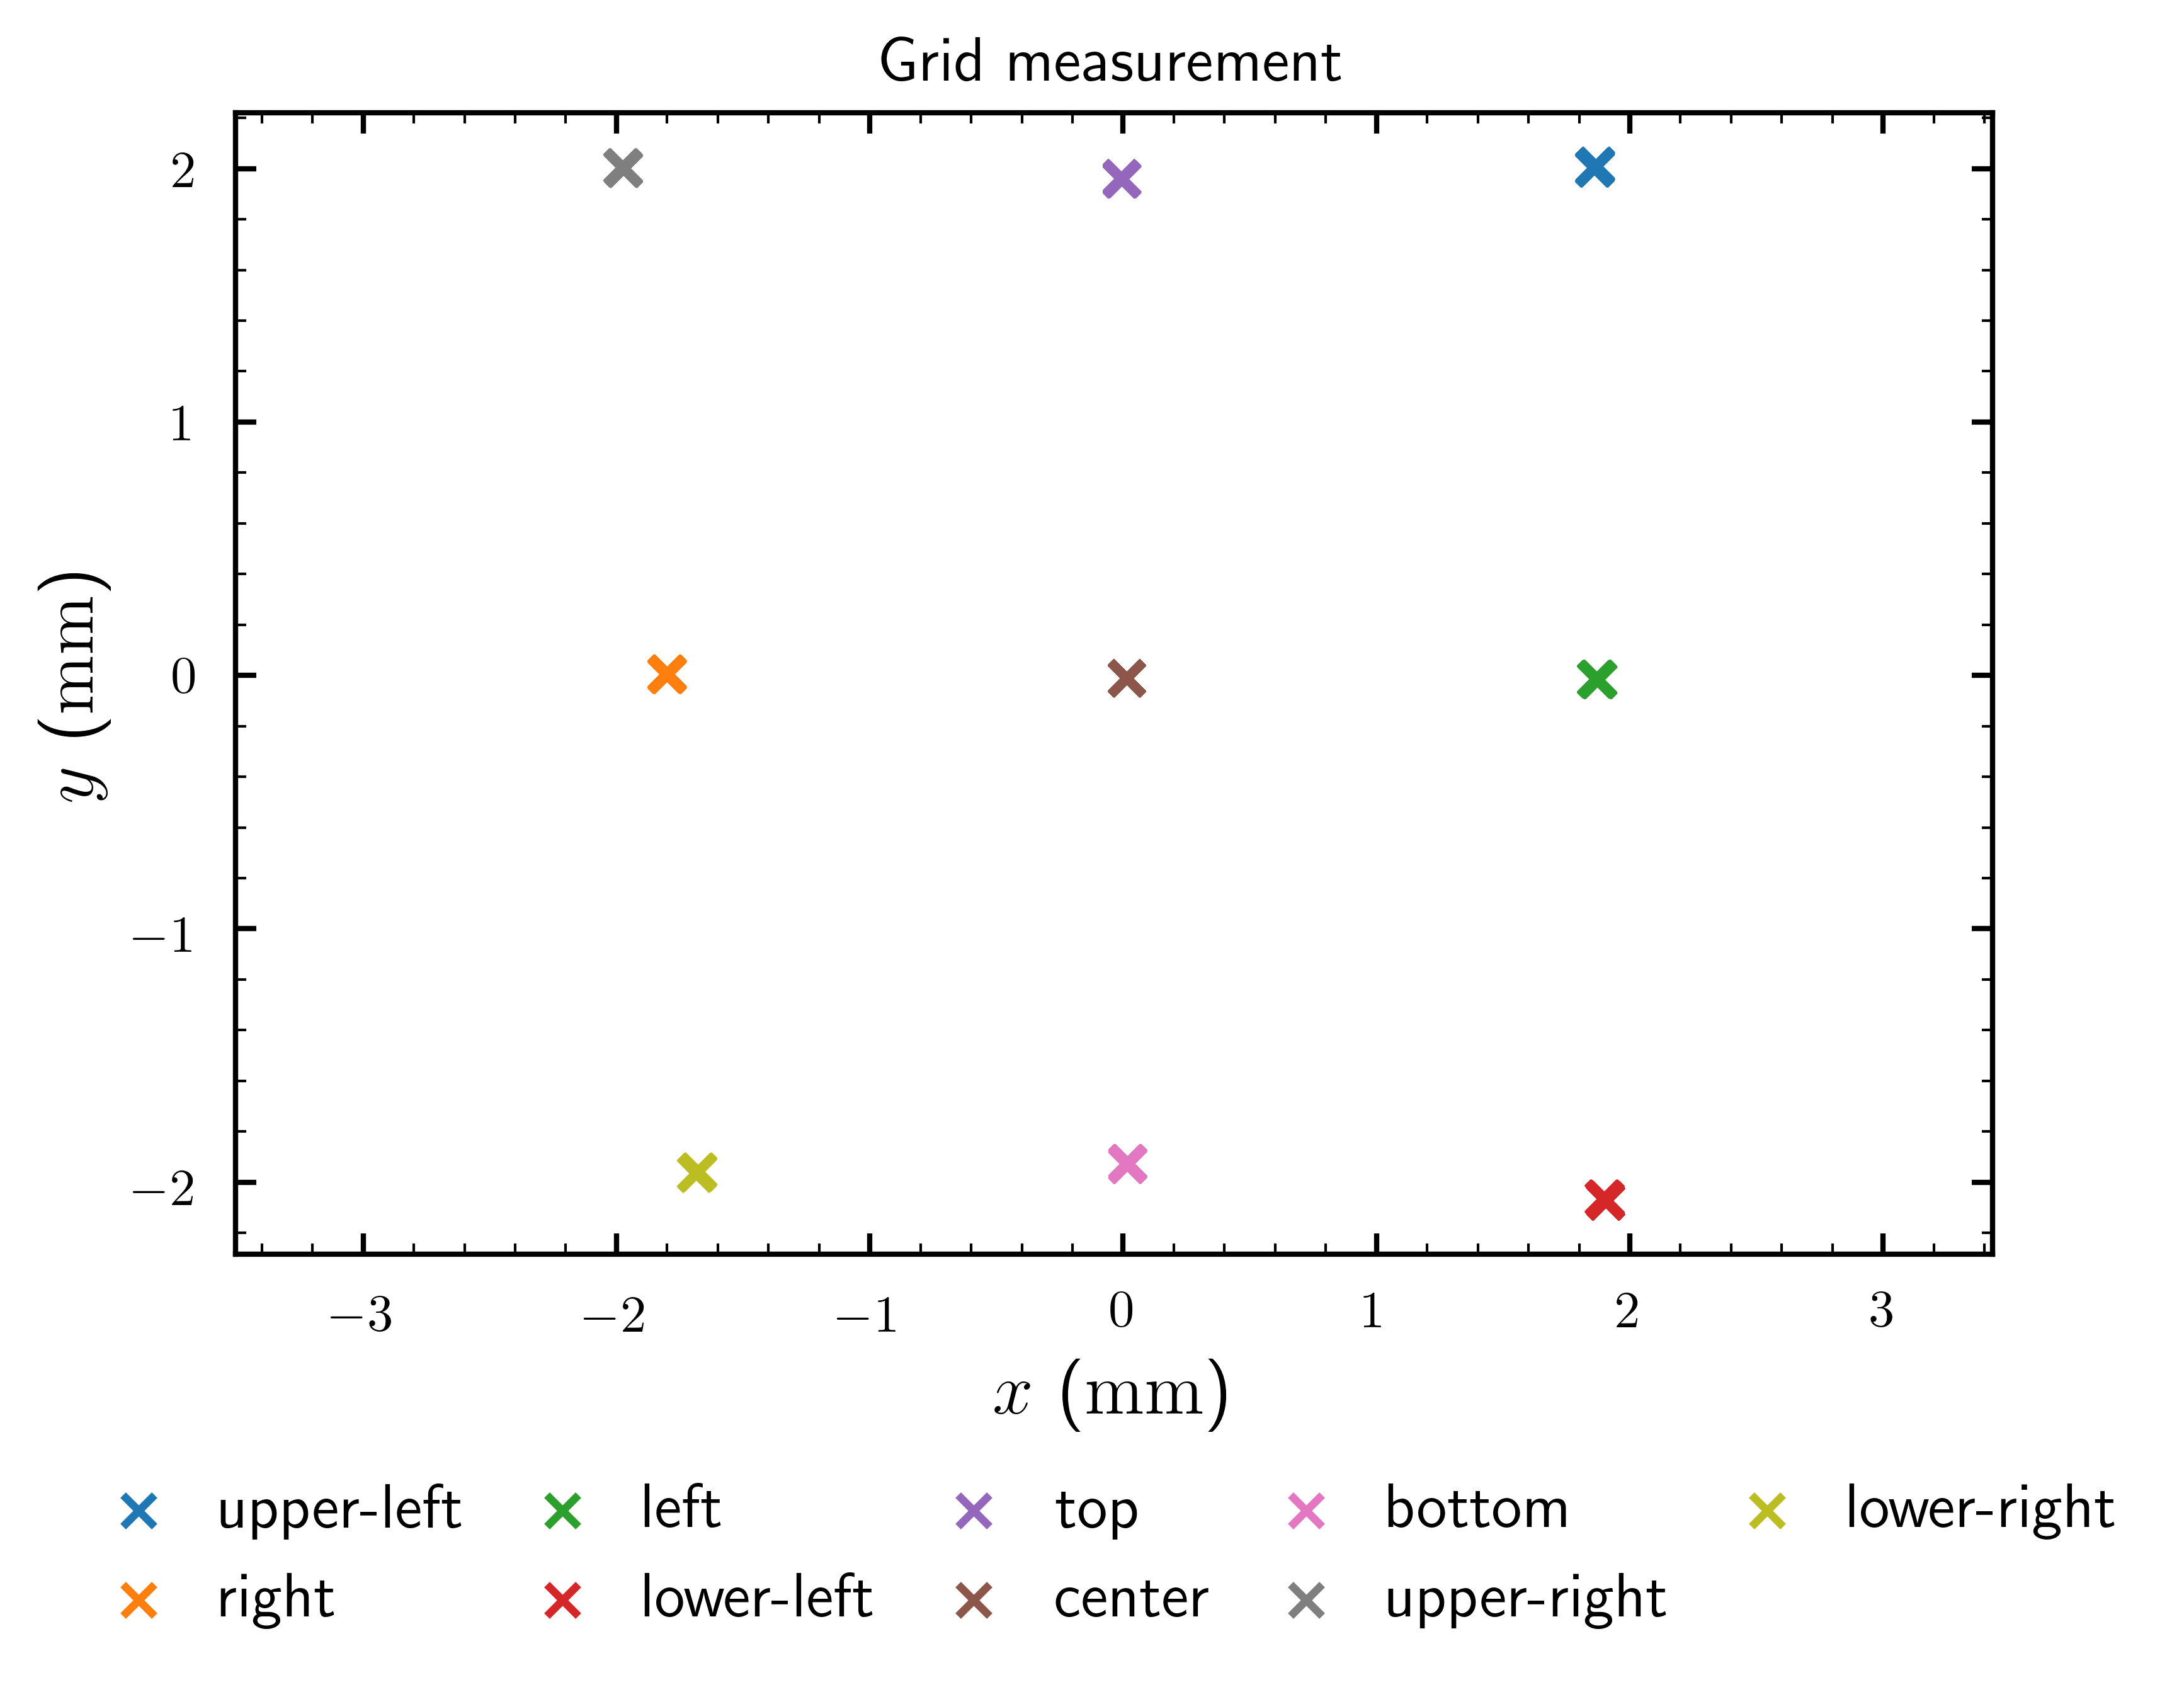

In [48]:
plt.figure(dpi=300, figsize=(6, 4))

for (pos, df) in data.items():
    x, y = convert(df)

    plt.scatter(x, y, label=pos, marker='x')
 
plt.title('Grid measurement')
plt.xlabel('$x$ (\si{\milli\meter})')
plt.ylabel('$y$ (\si{\milli\meter})')
plt.axis('equal')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.savefig(os.path.join(figuredir, 'grid-measurement.png'))
plt.show()

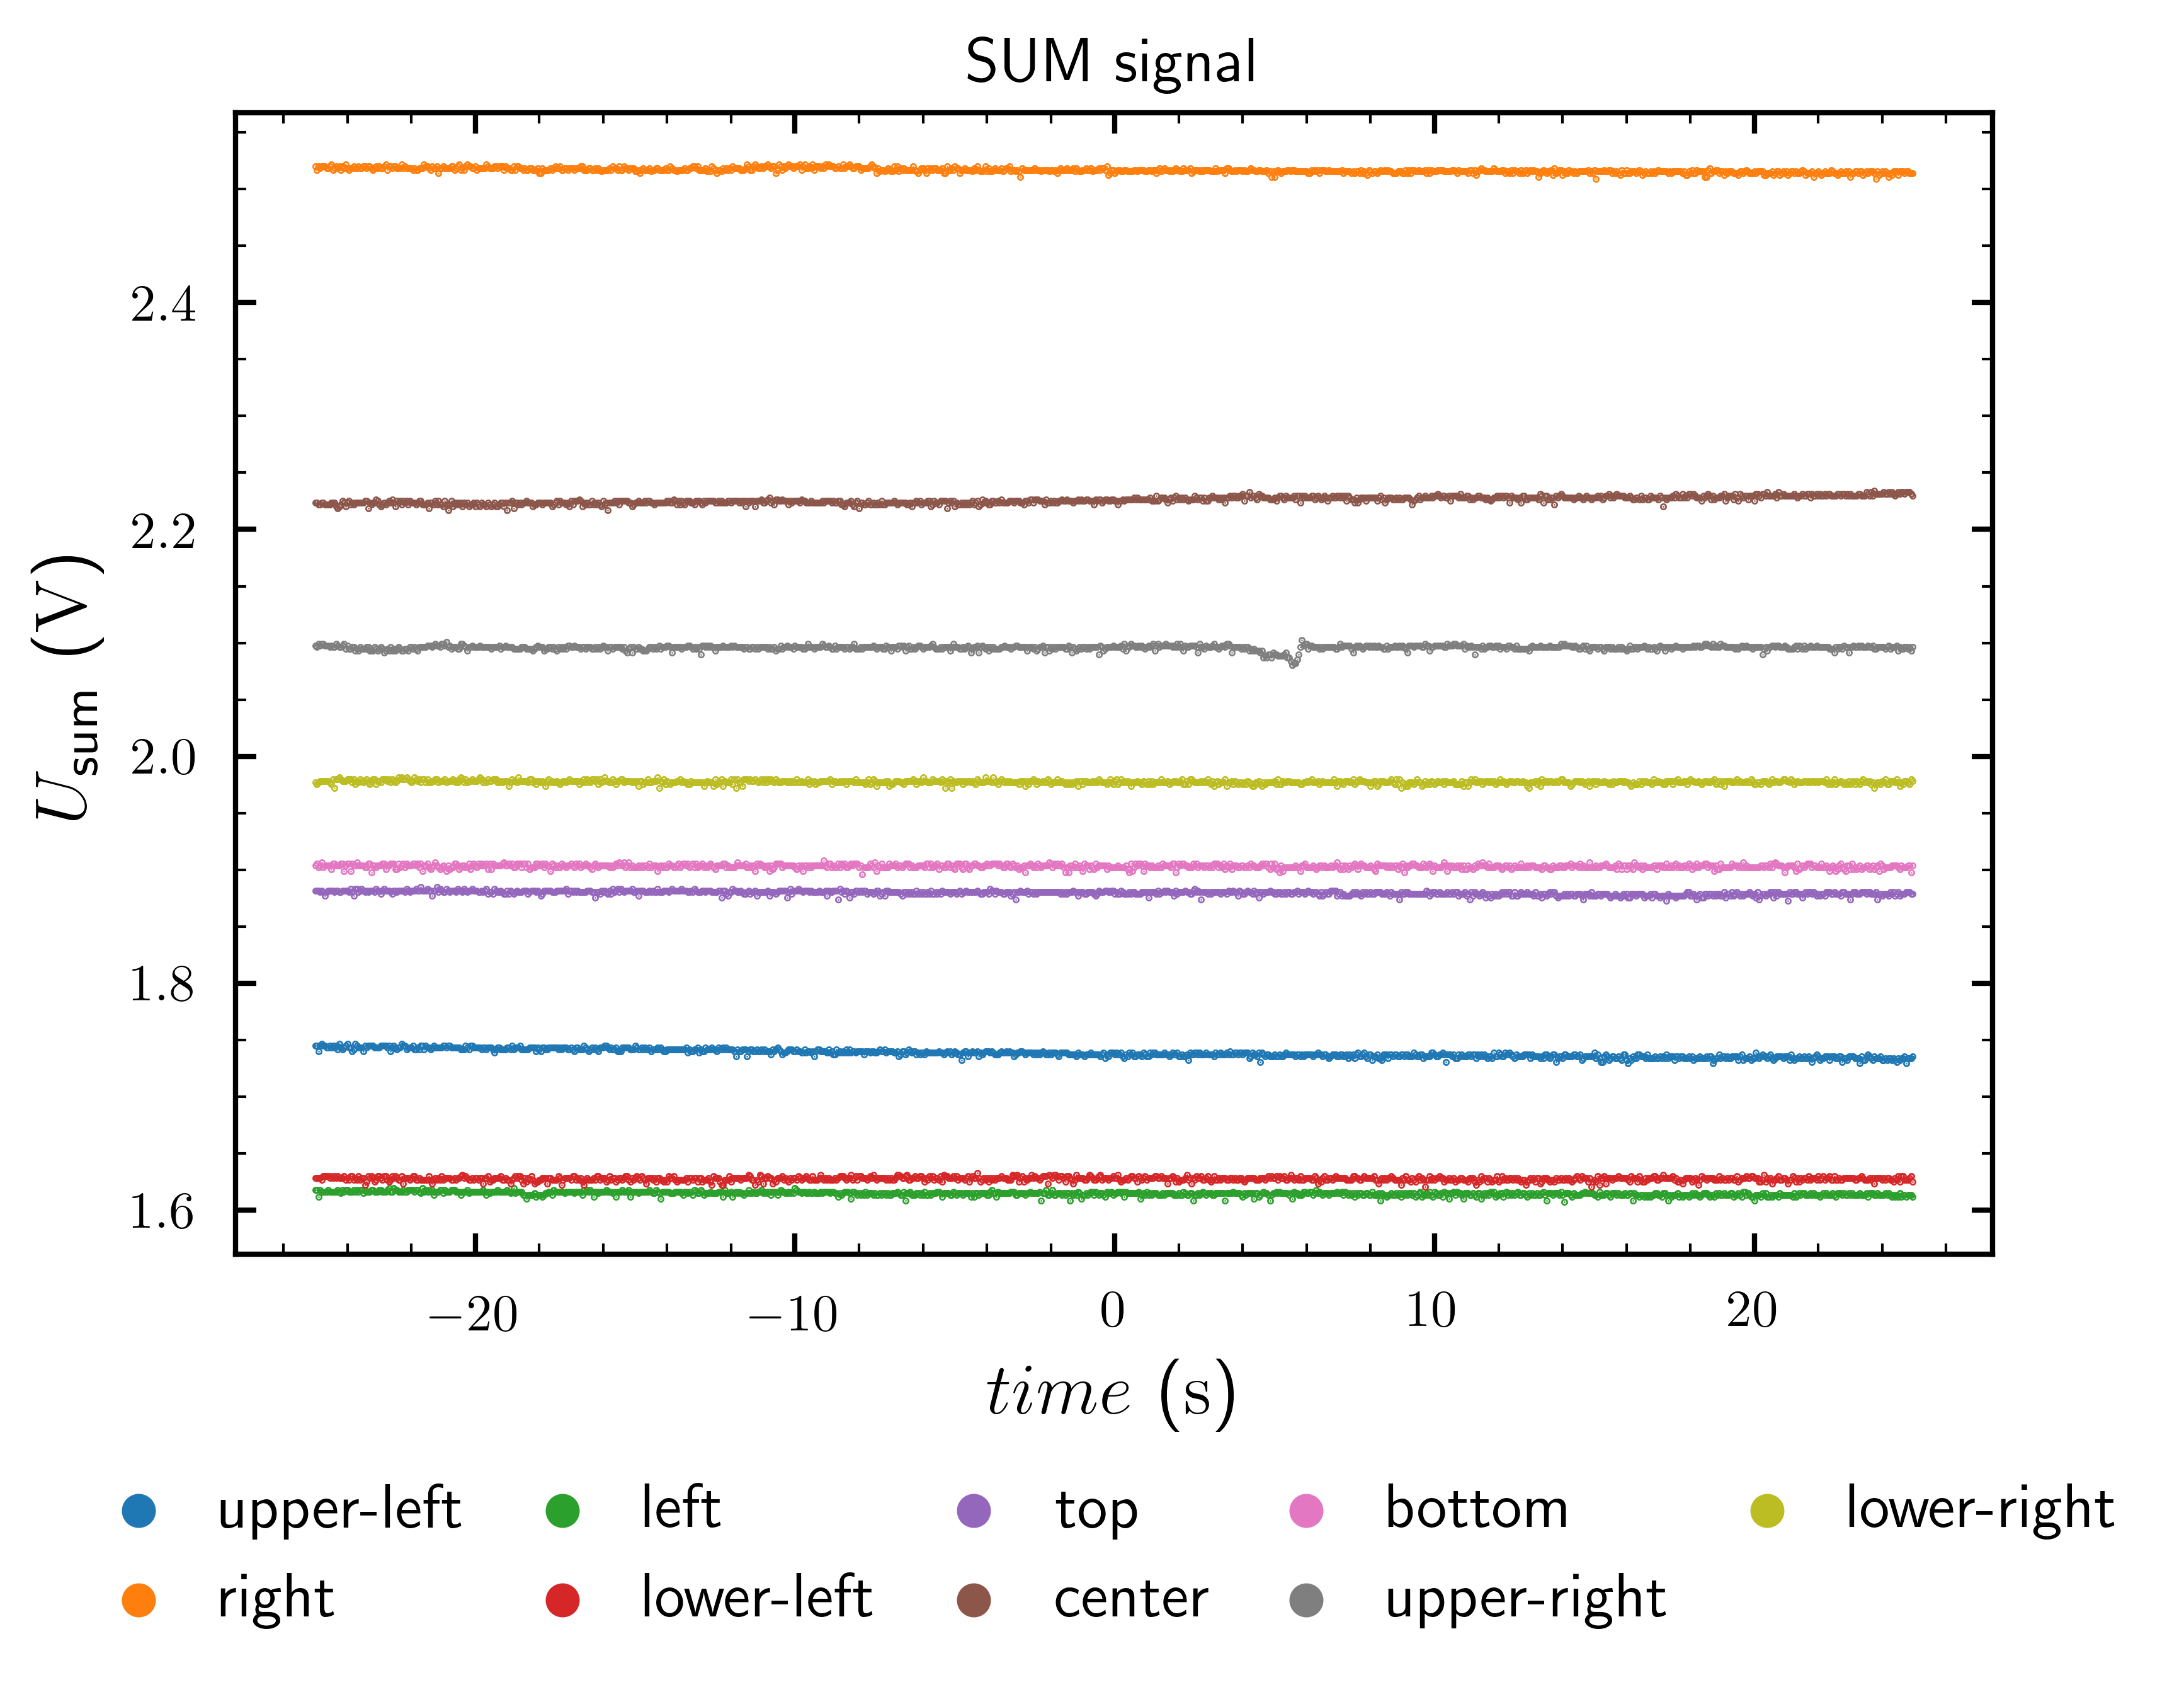

In [49]:
plt.figure(dpi=300, figsize=(6, 4))

for (pos, df) in data.items():
    plt.scatter(df['time'], df['SUM'], s=0.1, label=pos)
 
plt.title('SUM signal')
plt.xlabel(r'$time$ (\si{\second})')
plt.ylabel(r'$U_\text{sum}$ (\si{\volt})')
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
for handle in legend.legendHandles:
    handle._sizes = [30]
plt.savefig(os.path.join(figuredir, 'sum.png'))
plt.show()

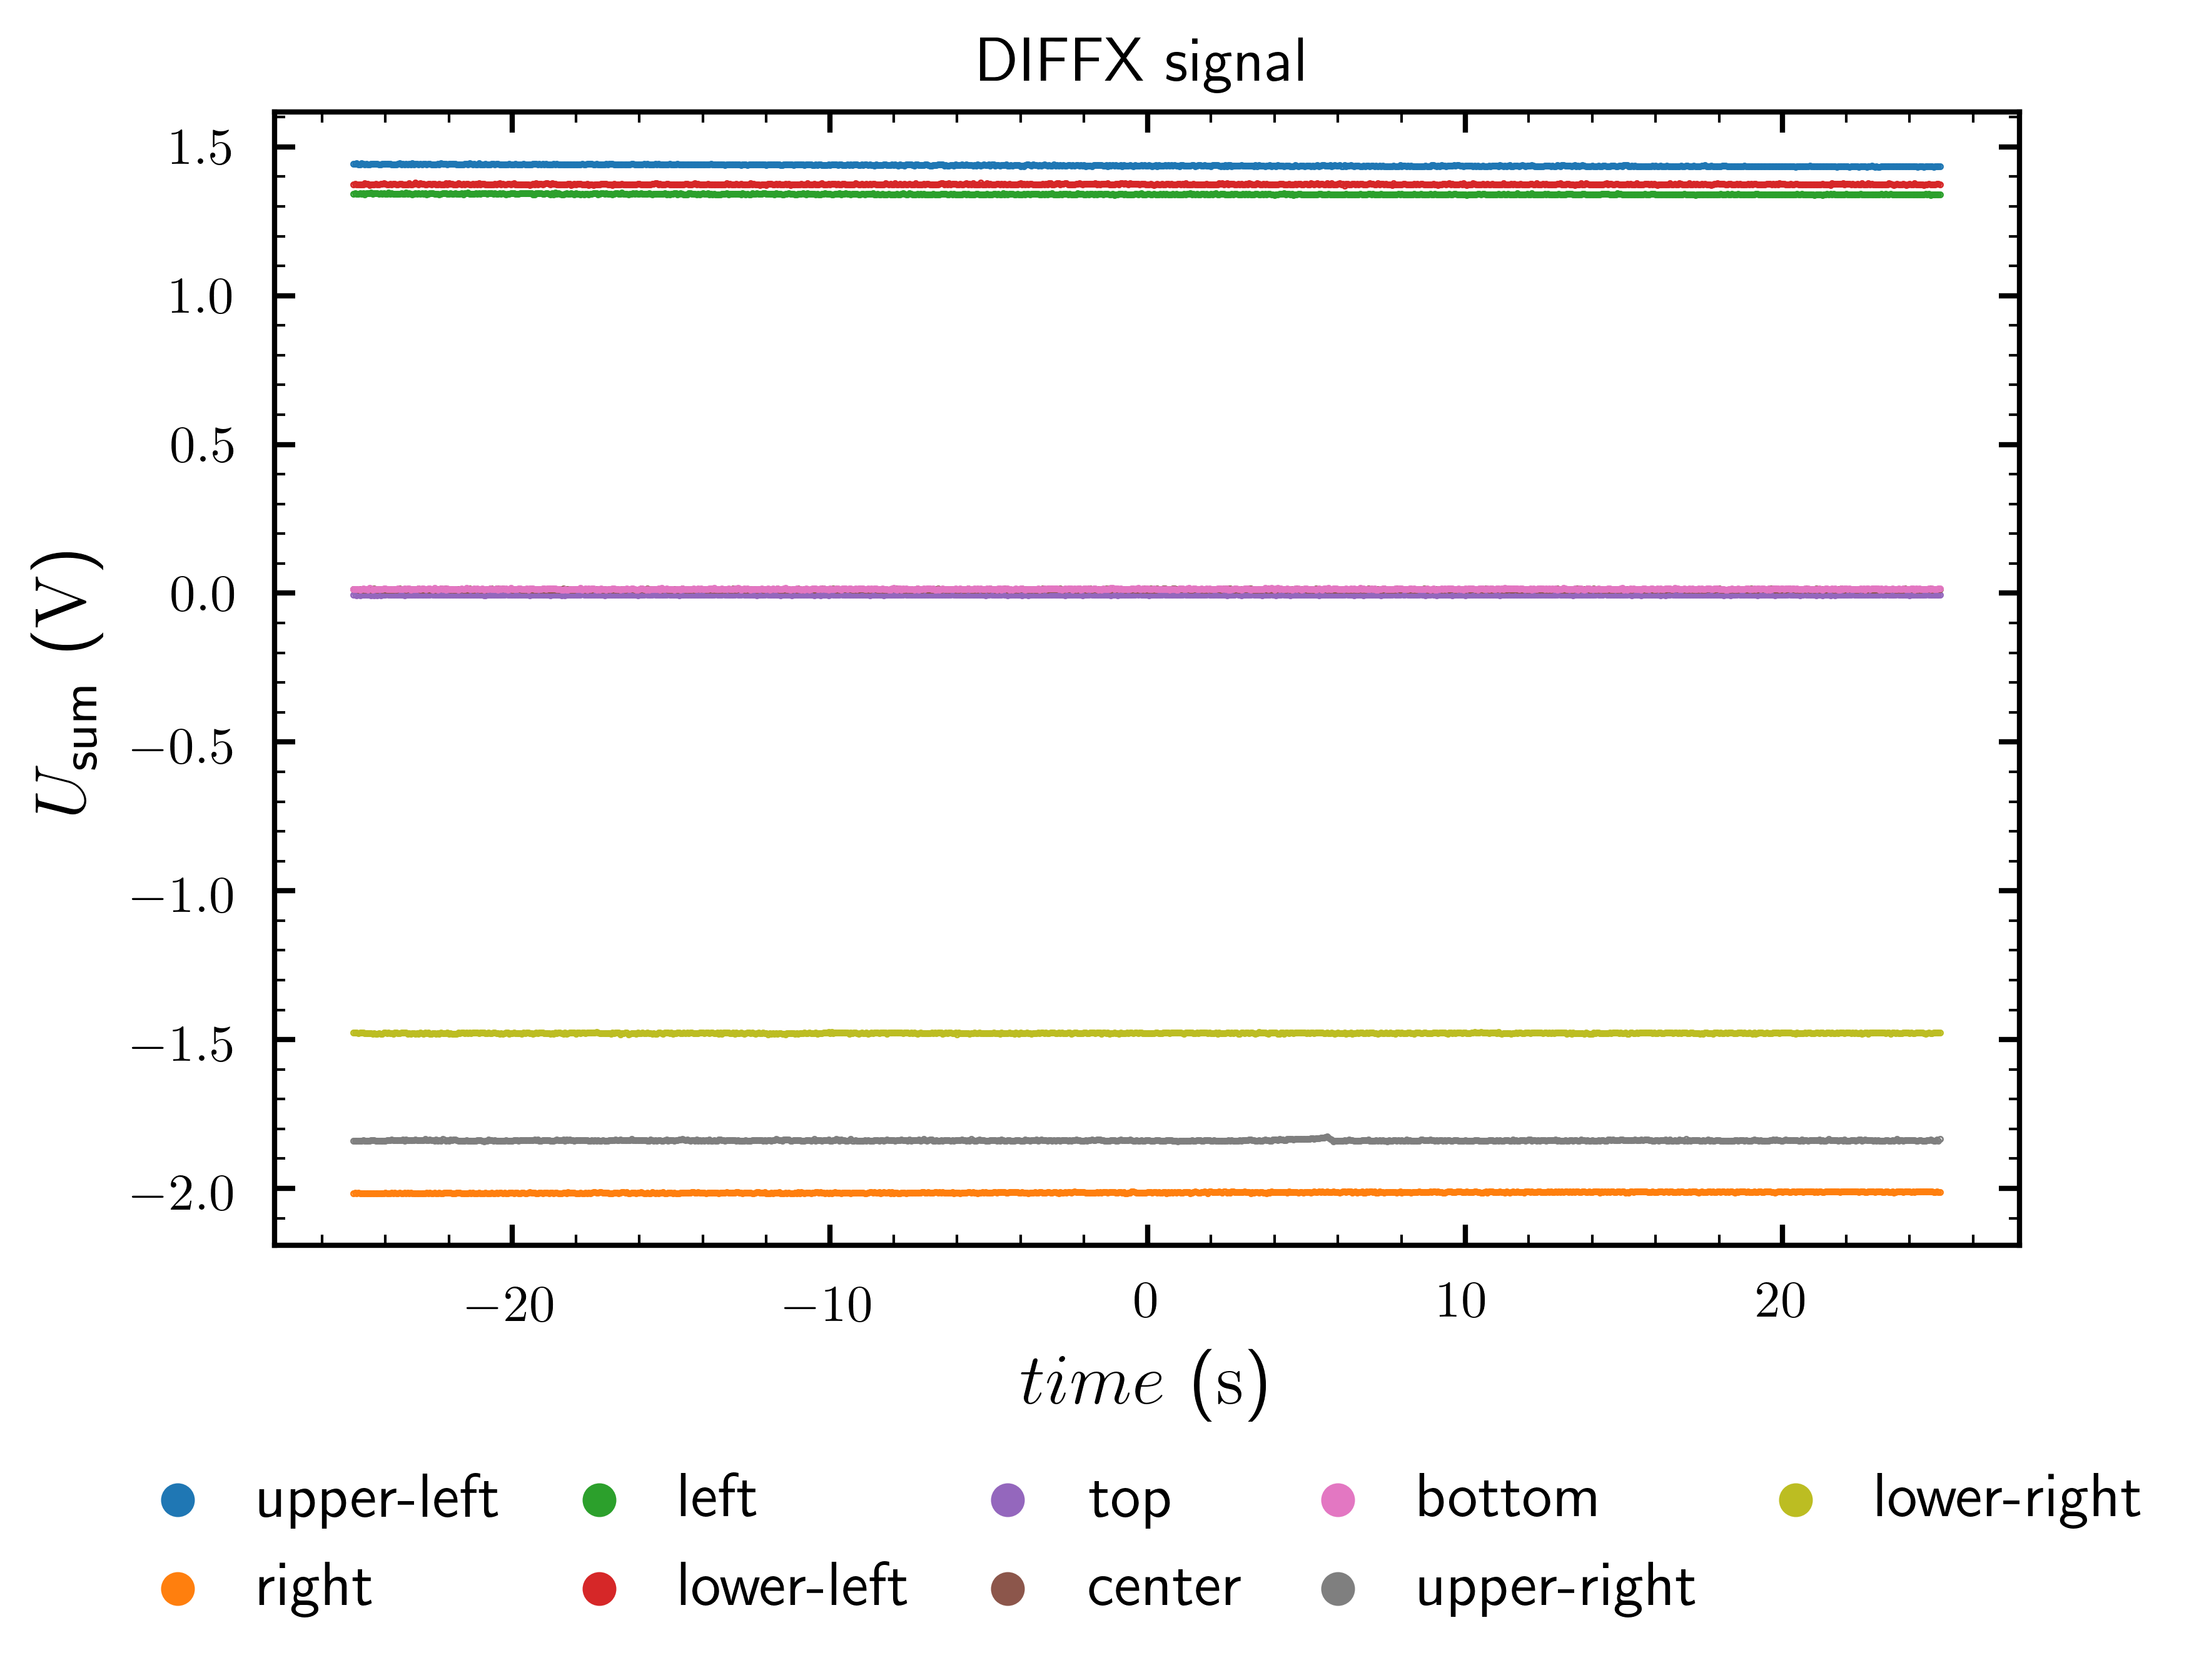

In [50]:
plt.figure(dpi=300, figsize=(6, 4))

for (pos, df) in data.items():
    plt.scatter(df['time'], df['DIFFX'], s=0.1, label=pos)
 
plt.title('DIFFX signal')
plt.xlabel(r'$time$ (\si{\second})')
plt.ylabel(r'$U_\text{sum}$ (\si{\volt})')
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
for handle in legend.legendHandles:
    handle._sizes = [30]
plt.savefig(os.path.join(figuredir, 'diffx.png'))
plt.show()

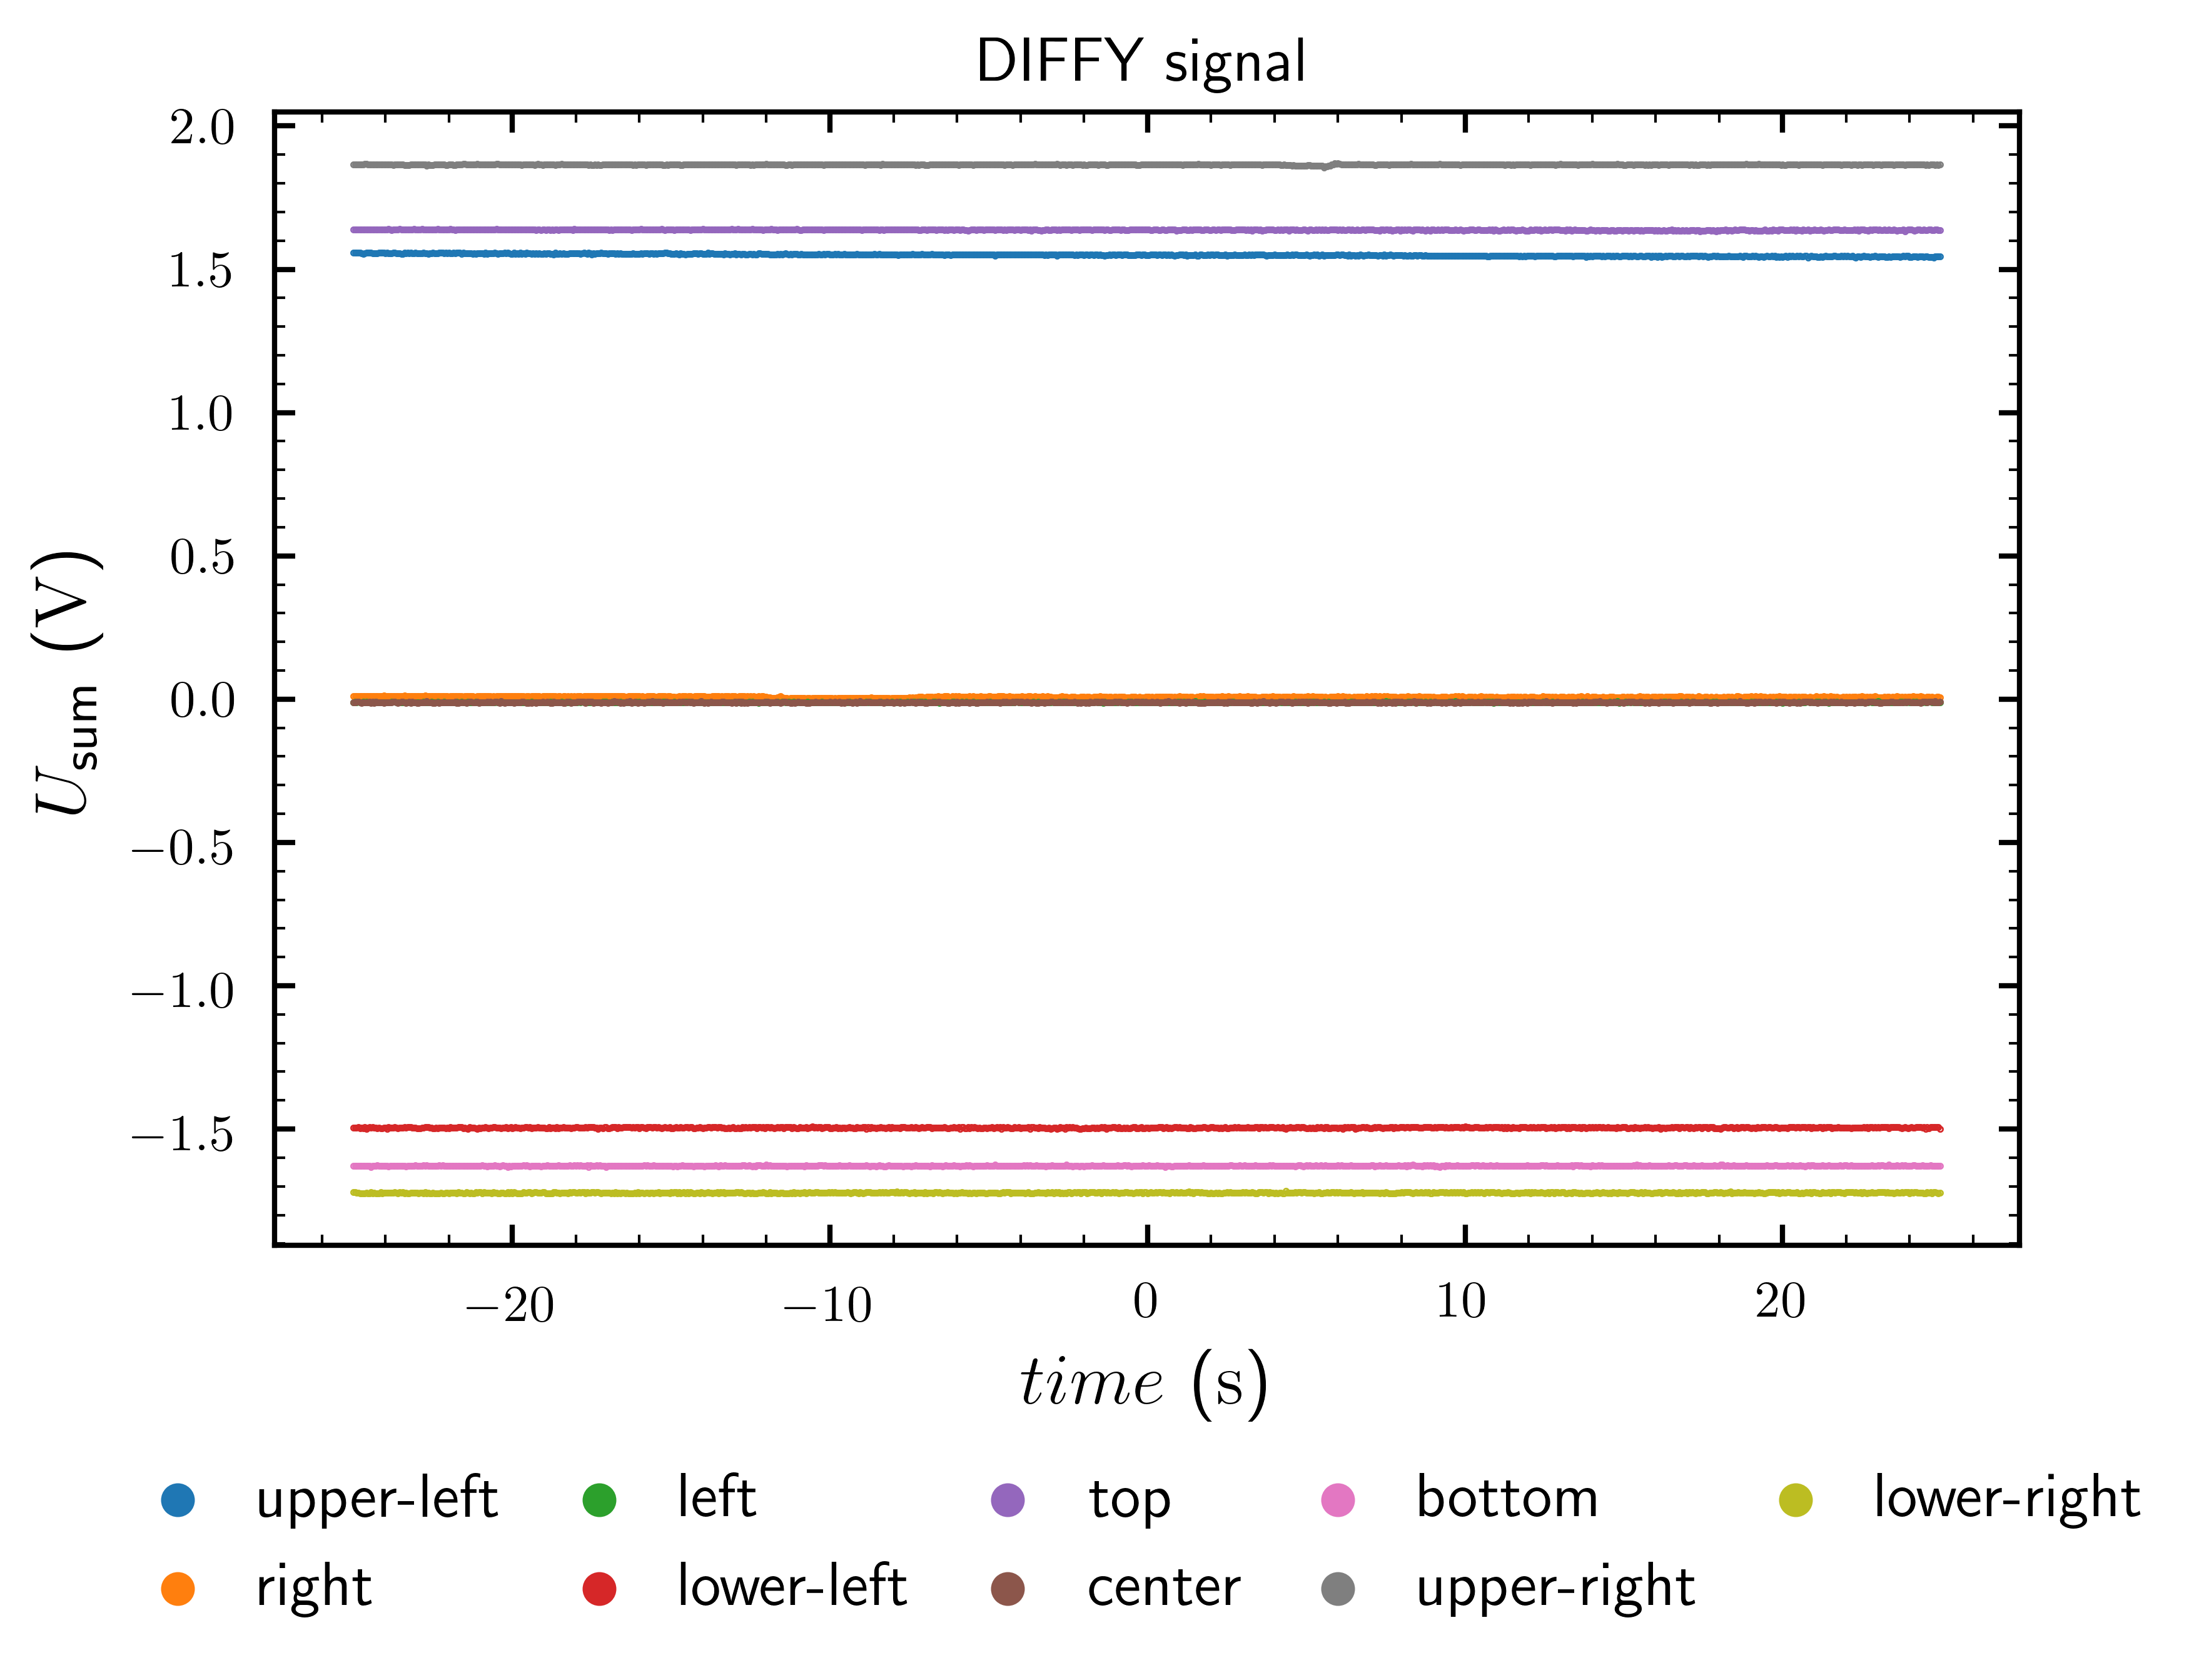

In [52]:
plt.figure(dpi=300, figsize=(6, 4))

for (pos, df) in data.items():
    plt.scatter(df['time'], df['DIFFY'], s=0.1, label=pos)
 
plt.title('DIFFY signal')
plt.xlabel(r'$time$ (\si{\second})')
plt.ylabel(r'$U_\text{sum}$ (\si{\volt})')
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
for handle in legend.legendHandles:
    handle._sizes = [30]
plt.savefig(os.path.join(figuredir, 'diffy.png'))
plt.show()

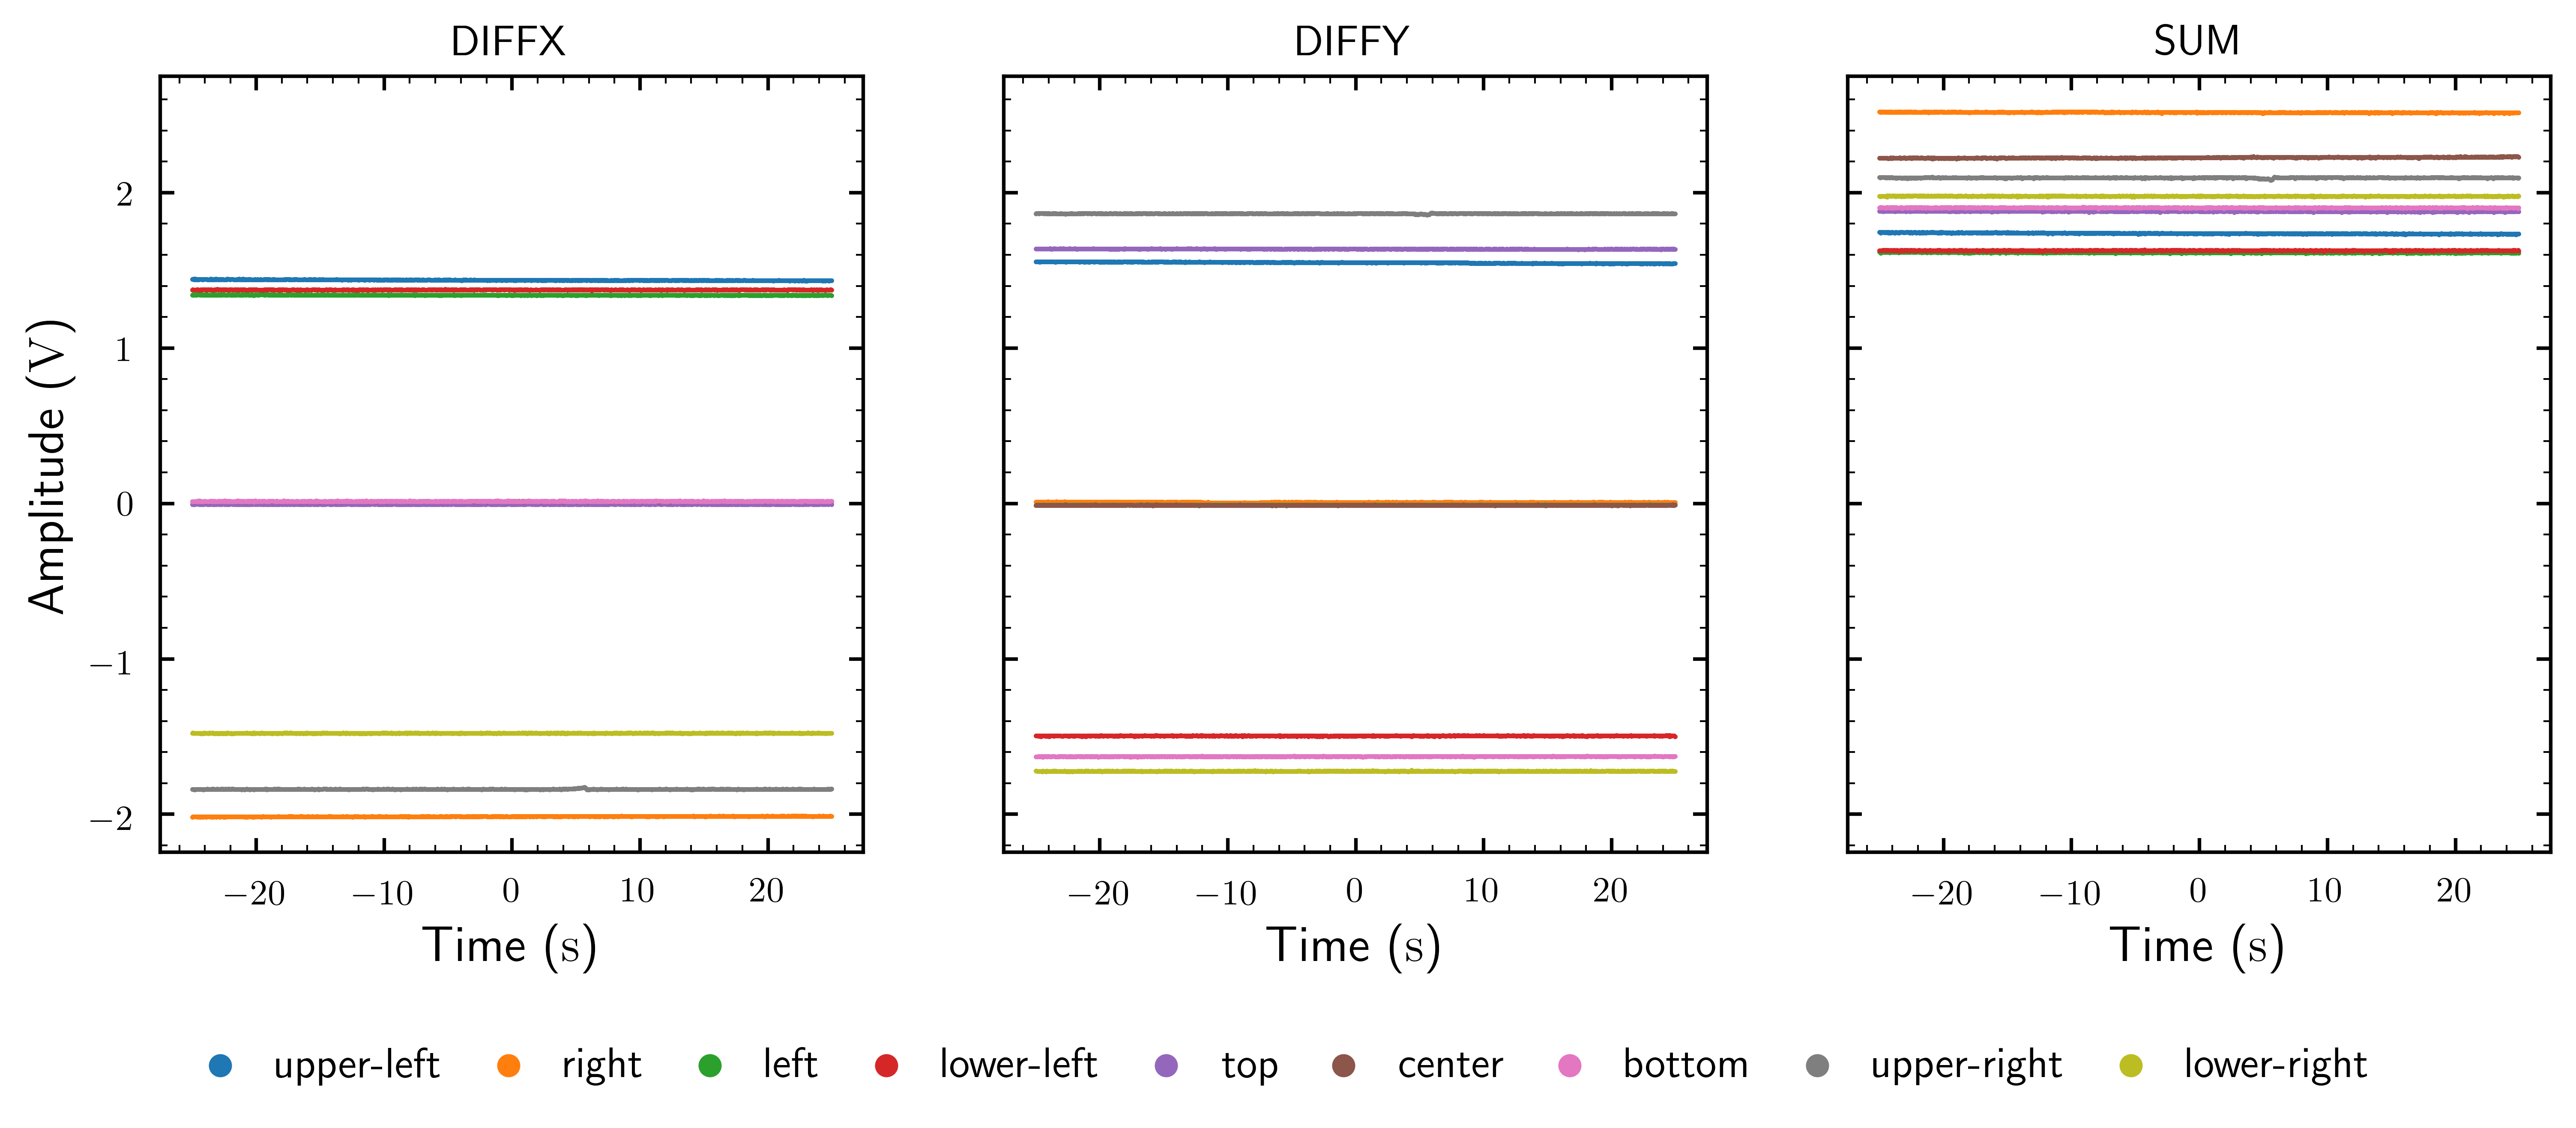

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=300, figsize=(12, 4), sharey=True)

axes[0].set_title('DIFFX')
for (pos, df) in data.items():
    axes[0].scatter(df['time'], df['DIFFX'], s=0.1, label=pos)

axes[1].set_title('DIFFY')
for (pos, df) in data.items():
    axes[1].scatter(df['time'], df['DIFFY'], s=0.1, label=pos)

axes[2].set_title('SUM')
for (pos, df) in data.items():
    axes[2].scatter(df['time'], df['SUM'], s=0.1, label=pos)

for axis in axes:
    axis.set_xlabel(r'Time (\si{\second})')
axes[0].set_ylabel(r'Amplitude (\si{\volt})')

legend = plt.legend(loc='upper center', bbox_to_anchor=(-0.8, -0.2), ncol=10)
for handle in legend.legendHandles:
    handle._sizes = [30]

#plt.subplots_adjust(hspace=.0, top=.98, bottom=.14)
    
plt.savefig(os.path.join(figuredir, 'voltages.png'))
plt.show()

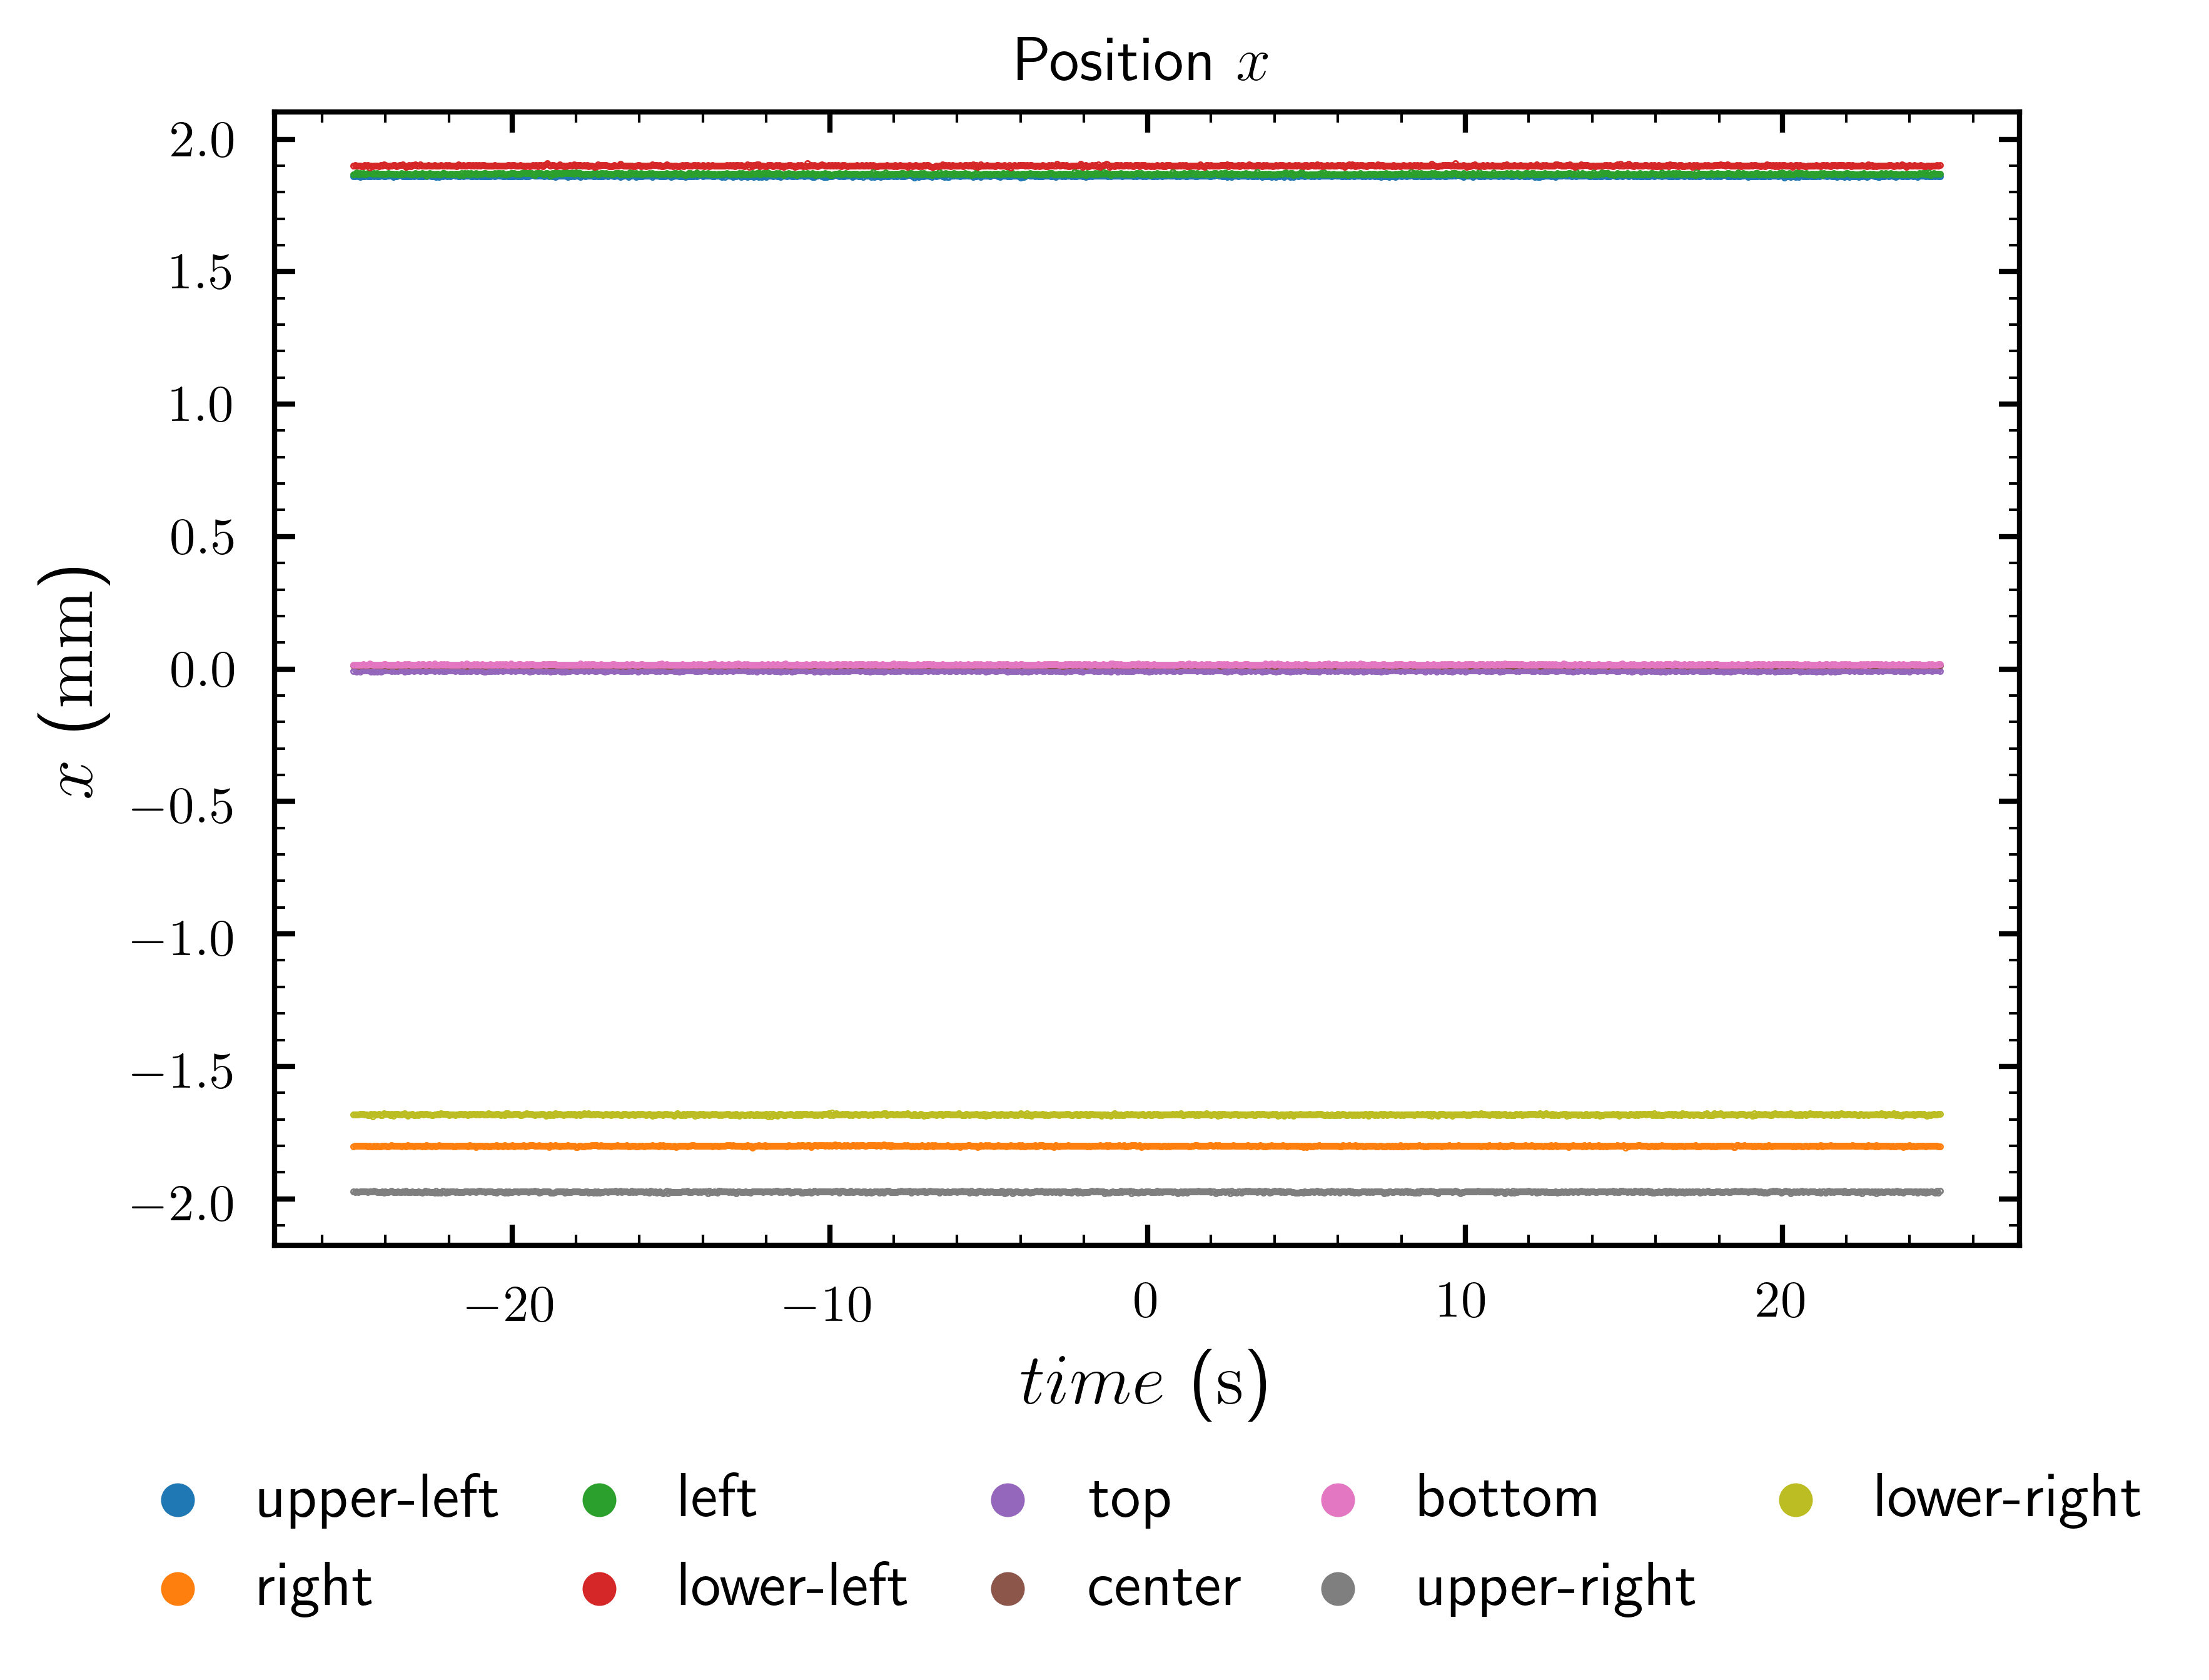

In [53]:
plt.figure(dpi=300, figsize=(6, 4))

for (pos, df) in data.items():
    plt.scatter(df['time'], convert(df)[0], s=0.1, label=pos)
 
plt.title(r'Position $x$')
plt.xlabel(r'$time$ (\si{\second})')
plt.ylabel(r'$x$ (\si{\milli\meter})')
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
for handle in legend.legendHandles:
    handle._sizes = [30]
plt.savefig(os.path.join(figuredir, 'x.png'))
plt.show()

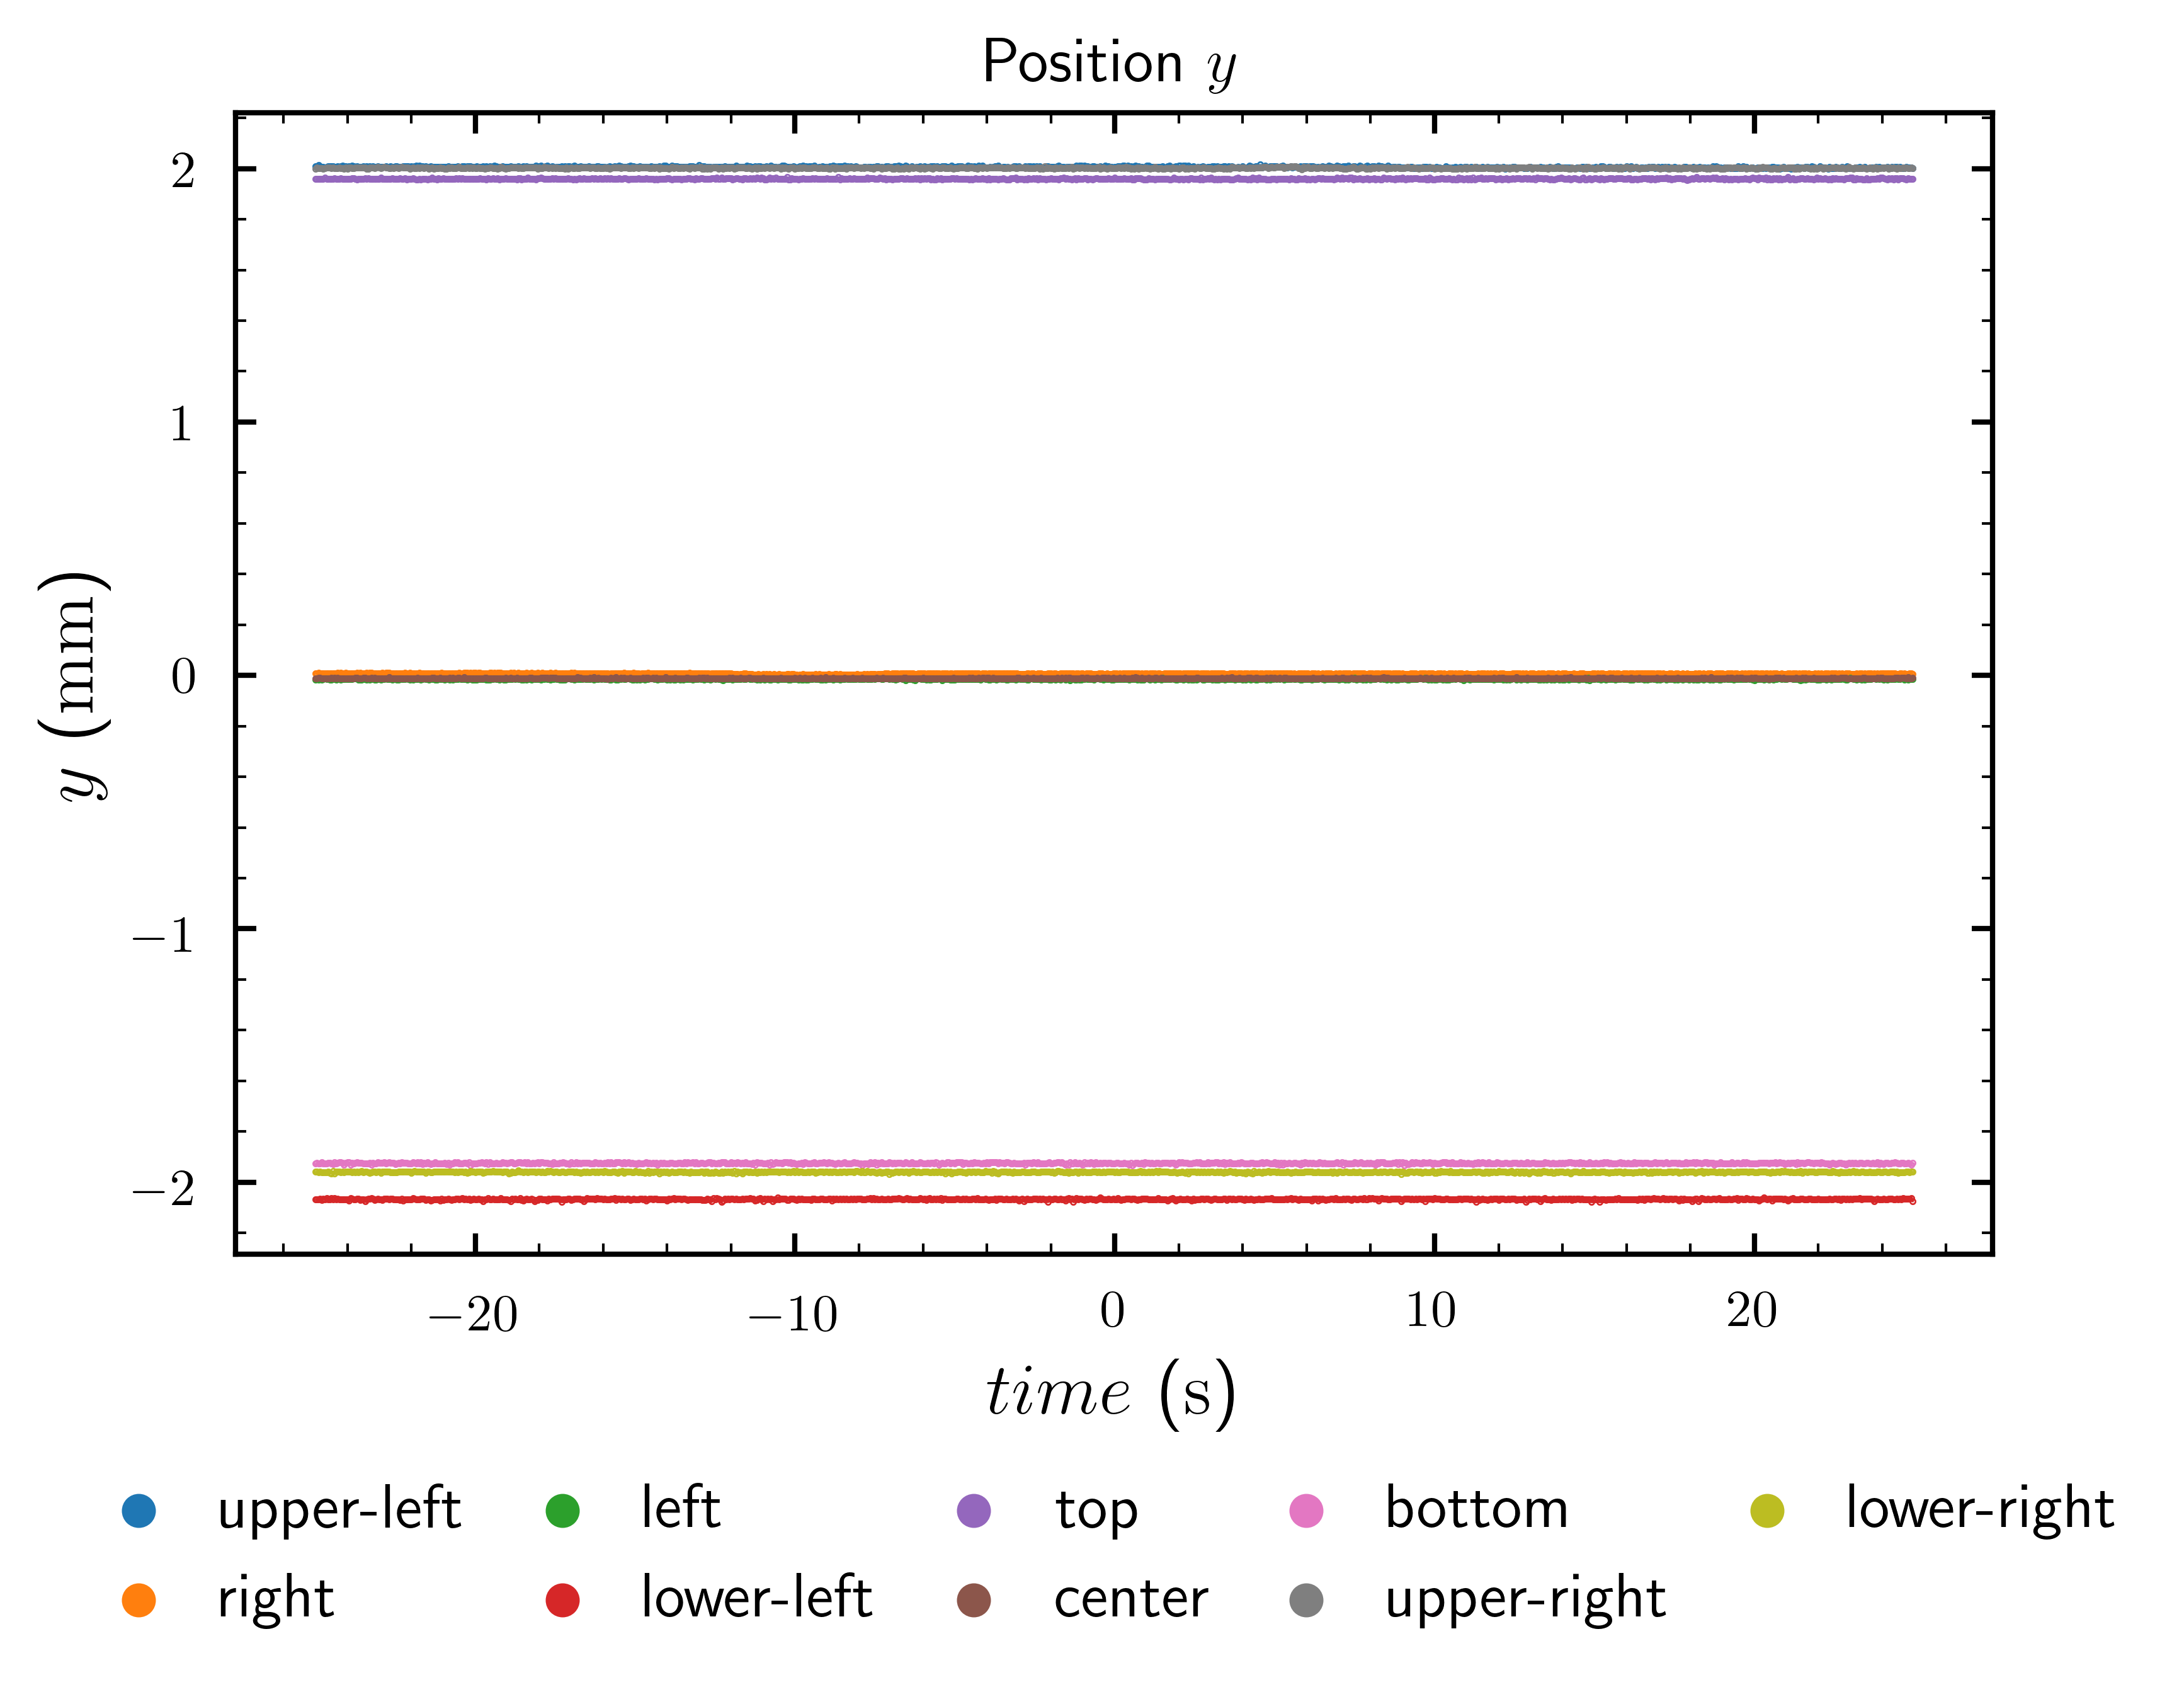

In [54]:
plt.figure(dpi=300, figsize=(6, 4))

for (pos, df) in data.items():
    plt.scatter(df['time'], convert(df)[1], s=0.1, label=pos)
 
plt.title(r'Position $y$')
plt.xlabel(r'$time$ (\si{\second})')
plt.ylabel(r'$y$ (\si{\milli\meter})')
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
for handle in legend.legendHandles:
    handle._sizes = [30]
plt.savefig(os.path.join(figuredir, 'y.png'))
plt.show()

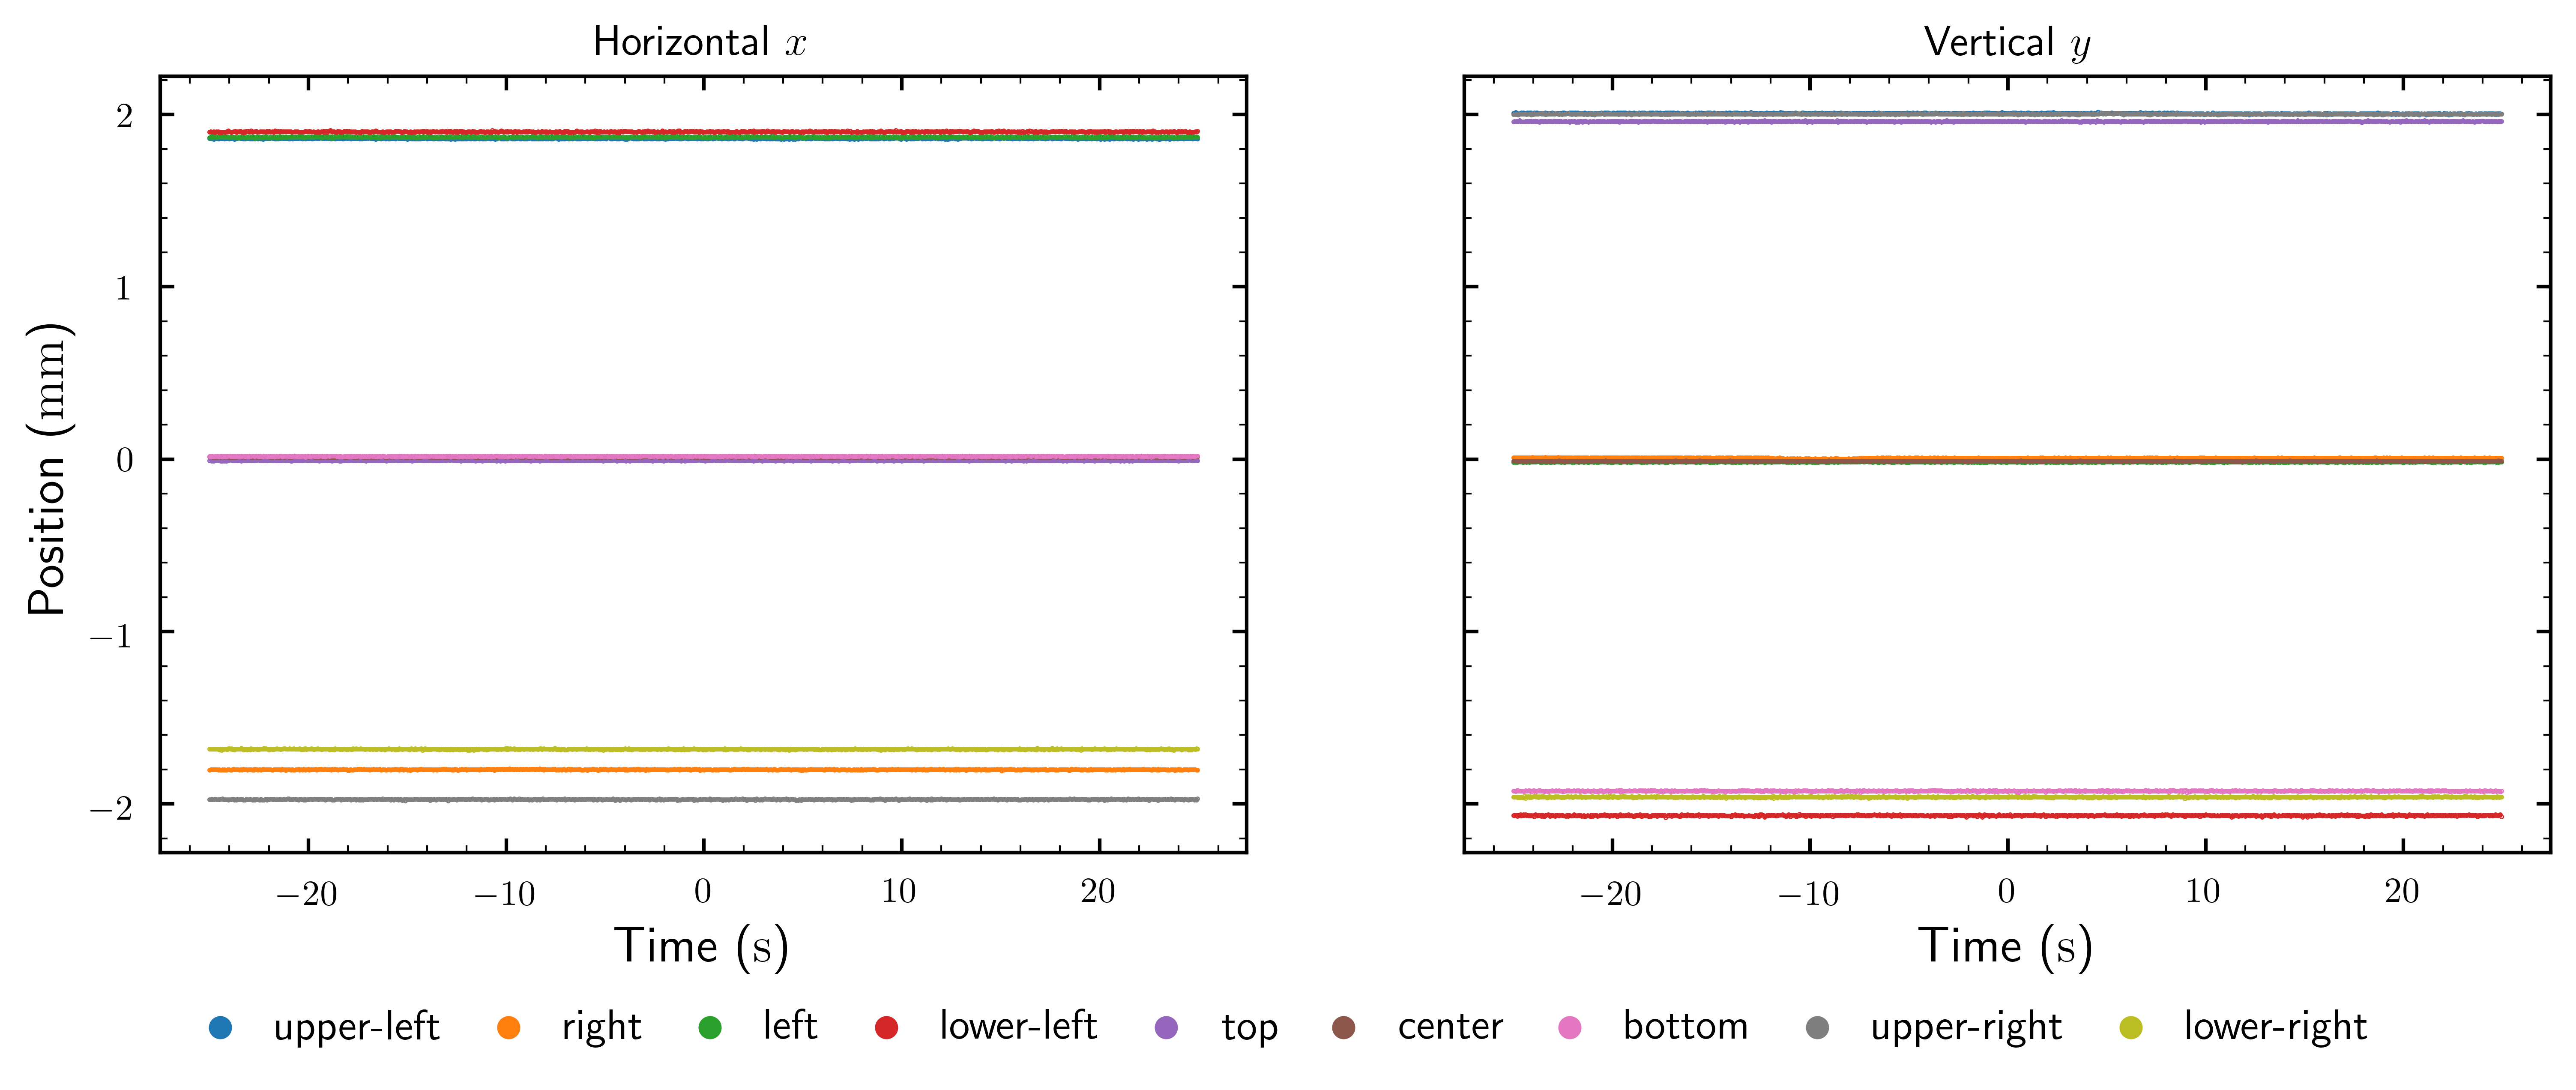

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=300, figsize=(12, 4), sharey=True)

axes[0].set_title(r'Horizontal $x$')
axes[1].set_title(r'Vertical $y$')

for (pos, df) in data.items():
    x, y = convert(df)

    axes[0].scatter(df['time'], x, s=0.1, label=pos)
    axes[1].scatter(df['time'], y, s=0.1, label=pos)

for axis in axes:
    axis.set_xlabel(r'Time (\si{\second})')
axes[0].set_ylabel(r'Position (\si{\milli\meter})')

legend = plt.legend(loc='lower left', bbox_to_anchor=(-1.2, -0.3), ncol=10)
for handle in legend.legendHandles:
    handle._sizes = [30]
    
plt.savefig(os.path.join(figuredir, 'positions.png'))
plt.show()

In [34]:
stats = {
    'measurement': [],
    'x (mm)': [],
    'y (mm)': [],
    'Δx (um)': [],
    'Δy (um)': [],
}

for (pos, df) in data.items():
  x, y = convert(df)

  stats['measurement'].append(pos)
  stats['x (mm)'].append(x.mean())
  stats['Δx (um)'].append(x.std() / 1e-3)
  stats['y (mm)'].append(y.mean())
  stats['Δy (um)'].append(y.std() / 1e-3)
  
stats = pd.DataFrame(stats)
stats

,measurement,x (mm),y (mm),Δx (um),Δy (um)
0,upper-left,1.861226,2.006433,2.030115,2.492949
1,right,-1.800417,0.007079,1.383440,1.611926
2,left,1.868906,-0.014955,2.190123,1.501383
3,lower-left,1.900150,-2.066774,2.264319,2.564306
4,top,-0.006467,1.959878,1.295067,1.673742
5,center,0.013641,-0.010910,1.078504,1.030747
6,bottom,0.017157,-1.924441,1.241181,2.110107
7,upper-right,-1.973599,2.002530,1.752384,1.654571
8,lower-right,-1.681969,-1.959685,1.784380,1.873961


In [37]:
ul = data['upper-left']

# total variance in mV
np.sqrt(ul['DIFFX'].var() + ul['DIFFY'].var() + ul['SUM'].var()) / 1e-3

5.987149654224611

The lens has $f=50\ \text{mm}$ and is $l=11\ \text{cm}$ away from the detector. The beam waist at the lens is about $w_0=3\ \text{mm}$.

The Rayleigh length of a Gaussian beam is defined as

$$
z_R=\frac{\pi w_0^2}{\lambda}.\tag{3}
$$

For our beam, we find $z_R\approx40\ \text{m}$.

Using Gaussian optics, we find that a Gaussian beam of initial beam waist $w_0$ directly at the point of a thin lense with focal length $f$ changes to

$$
w^\prime_0=\frac{w_0}{\sqrt{(1-s/f)^2+(z_R/f)^2}},\tag{4}
$$

when projected on a plane of distance $s$ from the lens.

In our numerical example this yields $w^\prime_0\lessapprox4\ \text{um}$.


The above calculation is somewhat compatible with the resolution we obtained from the standard deviation of the voltages. However, it is unclear how much of the uncertainty in the voltage is due to the finite spot size on the photosensitive area and how much is infact thermal or shot noise.

Without illumination of the photodiode, we measured the following voltages.

| Signal | Mean (mV) | Standard deviation (uV) |
| ------ | --------- | ----------------------- |
| DIFFX | 0.1 | 17 |
| DIFFY | 0.4 | 17 |
| SUM | 1.2 | 32 |

Using Gaussian addition of variances, the total standard deviation is of the order 40 uV which is significantly less than the total variance of the, for example, upper-left position measument, which turned out to be 6 mV.